# Ficha6-CNNs-P3

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) =mnist.load_data()
# Normalize the images to the range [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the input layer with the shape matching the dataset's image size (28x28 pixels, 1 channel)
inputs = Input(shape=(28, 28, 1))

# JUSTIF THE NUMBER OF FILTERS
# First convolutional layer with 10 filters and a 3x3 kernel, followed by max pooling
x = Conv2D(10, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)

# JUSTIFY THE NUMBER OF FILTERS
# Second convolutional layer with 5 filters and a 3x3 kernel, followed by max pooling
x = Conv2D(5, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

# JUSTIFY THE DROPOUT
# Apply dropout with a rate of 25% to reduce overfitting
x = Dropout(0.25)(x)

# Flatten the output before the dense layers
x = Flatten()(x)

# First dense layer with 128 neurons and ReLU activation
x = Dense(128, activation='relu')(x)

# Output layer with 10 neurons (one for each digit class) and softmax activation
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Display the model architecture
model.summary()

# Compile the model with the Adam optimizer and categorical cross-entropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with a validation split of (---)
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 5)         455       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 5)           0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 5)           0   

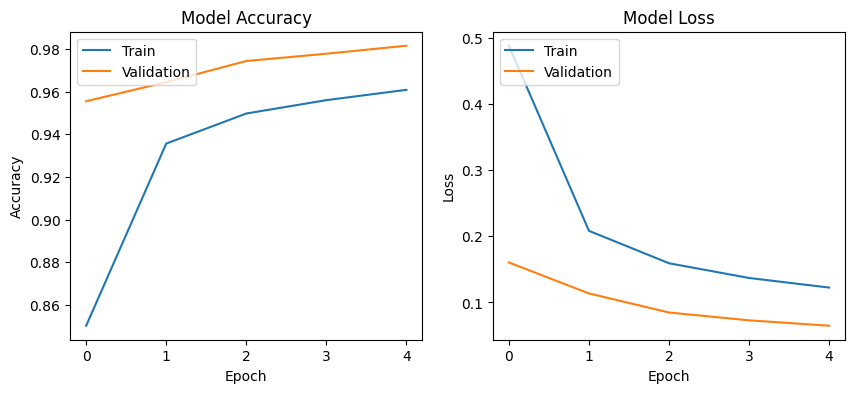

In [4]:
import matplotlib.pyplot as plt
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history)

In P1, P2, P3, we used:
1. Pure DNN.
2. Encoding, then BinaryDTree.
3. CNN.